In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
human_mi_path = './human_mi.csv'
human = pd.read_csv(human_mi_path, index_col = 0)

mouse_mi_path = './mouse_mi.csv'
mouse = pd.read_csv(mouse_mi_path, index_col = 0)

In [16]:
# subset along statistically significant genes expressed in >1% of fibroblast/decidual cells
mouse_sig = mouse[mouse['significant'] & (mouse['fraction_cells_expressing'] > 0.01)].copy()
human_sig = human[human['significant'] & (human['fraction_cells_expressing'] > 0.01)].copy()

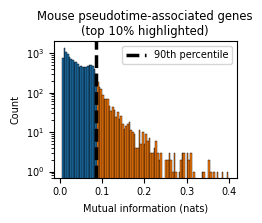

In [ ]:
# convert mm to inches
width_in = 60 / 25.4   # ≈ 2.36 inches
height_in = 45 / 25.4  # ≈ 1.77 inches

# set font size
plt.rcdefaults()
plt.rcParams.update({
    "font.size": 7
})

# data
y = mouse_sig['mi']

# get 90th percentile cutoff
cutoff = np.quantile(y, 0.9)

# create figure
fig, ax = plt.subplots(figsize=(width_in, height_in))

# histogram (base in blue)
counts, bins, patches = ax.hist(
    y, bins=100,
    edgecolor="black",
    log=True,
    color="tab:blue",
    linewidth=0.3,
)

# highlight top 10% bins in orange
for c, b, p in zip(counts, bins, patches):
    if b >= cutoff:
        p.set_facecolor("tab:orange")

# vertical line at cutoff in black, dashed, thicker
ax.axvline(cutoff, color="black", linestyle="--", linewidth=2.5, label="90th percentile")

# labels, legend
ax.set_xlabel("Mutual information (nats)")
ax.set_ylabel("Count")
ax.set_title(
    "Mouse pseudotime-associated genes (top 10% highlighted)",
    wrap=True
)
ax.legend()

# save
plt.savefig("./mouse_mi_histogram.png", dpi=300, bbox_inches="tight")
plt.show()

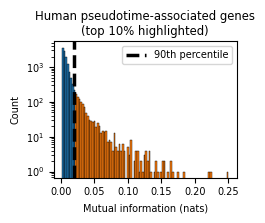

In [19]:
# convert mm to inches
width_in = 60 / 25.4   # ≈ 2.36 inches
height_in = 45 / 25.4  # ≈ 1.77 inches

# set font size
plt.rcdefaults()
plt.rcParams.update({
    "font.size": 7
})

# data
y = human_sig['mi']

# compute 90th percentile cutoff
cutoff = np.quantile(y, 0.9)

# create figure
fig, ax = plt.subplots(figsize=(width_in, height_in))

# histogram (base in blue)
counts, bins, patches = ax.hist(
    y, bins=100,
    edgecolor="black",
    log=True,
    color="tab:blue",
    linewidth=0.3,
)

# highlight top 10% bins in orange
for c, b, p in zip(counts, bins, patches):
    if b >= cutoff:
        p.set_facecolor("tab:orange")

# vertical line at cutoff in black, dashed, thicker
ax.axvline(cutoff, color="black", linestyle="--", linewidth=2.5, label="90th percentile")

# labels, legend
ax.set_xlabel("Mutual information (nats)")
ax.set_ylabel("Count")
ax.set_title(
    "Human pseudotime-associated genes (top 10% highlighted)",
    wrap=True
)
ax.legend()

# save
plt.savefig("./human_mi_histogram.png", dpi=300, bbox_inches="tight")
plt.show()